<a href="https://colab.research.google.com/github/datlt189/AI_LeTienDat_20146151/blob/main/10_Vietnamese_dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#tải tập dữ liệu hình ảnh, chuyển đổi chúng thành mảng NumPy,
#và lưu các mảng này vào đĩa để sử dụng trong quá trình đào tạo hoặc kiểm tra mô hình.
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [ ]:
# đoạn mã này được sử dụng để tải các tệp ảnh và nhãn tương ứng từ thư mục trên Google Drive
# chuẩn bị chúng cho việc huấn luyện mô hình học máy.
folder = '/content/drive/MyDrive/10_Vietnamese_dishes/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('banh_bo'):
    output= 1.0
  if file.startswith('banh_bot_loc'):
    output= 2.0
  if file.startswith('banh_cong'):
    output= 3.0
  if file.startswith('banh_da_lon'):
    output= 4.0
  if file.startswith('banh_mi'):
    output= 5.0
  if file.startswith('banh_tai_heo'):
    output= 6.0
  if file.startswith('banh_tieu'):
    output= 7.0
  if file.startswith('banh_trung_thu'):
    output= 8.0
  if file.startswith('banh_xeo'):
    output= 9.0
  photo = load_img(folder + file, target_size= (40,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [ ]:
# lưu trữ các mảng numpy photos và labels
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/data_train/food_photos.npy', photos)
save('/content/drive/MyDrive/data_train/food_labels.npy', labels)

(2580, 40, 40, 3) (2580,)


In [ ]:
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [ ]:
print(test_x.shape, train_x.shape)

(129, 40, 40, 3) (2451, 40, 40, 3)


In [ ]:
#về khoảng giá trị từ 0 đến 1 bằng cách chia tất cả các giá trị pixel cho 255
train_x = train_x.reshape((2451, 40, 40, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((129, 40, 40, 3))
test_x = test_x.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,10)
test_y = to_categorical(test_y,10)

In [ ]:
# khai báo các thành phần cần thiết để xây dựng một mô hình mạng neural 
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 10
classes = 10

In [ ]:
# khởi tạo một mô hình mạng neural convolutional (CNN) 
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (40, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [ ]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                        

In [ ]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/10
39/39 [==============================] - 97s 2s/step - loss: 2.1509 - accuracy: 0.1656
Epoch 2/10
39/39 [==============================] - 97s 2s/step - loss: 2.0752 - accuracy: 0.1983
Epoch 3/10
39/39 [==============================] - 97s 3s/step - loss: 2.1013 - accuracy: 0.2011
Epoch 4/10
39/39 [==============================] - 99s 3s/step - loss: 2.0141 - accuracy: 0.2171
Epoch 5/10
39/39 [==============================] - 105s 3s/step - loss: 1.9527 - accuracy: 0.2595
Epoch 6/10
39/39 [==============================] - 107s 3s/step - loss: 1.8096 - accuracy: 0.3182
Epoch 7/10
39/39 [==============================] - 104s 3s/step - loss: 1.7724 - accuracy: 0.3386
Epoch 8/10
39/39 [==============================] - 105s 3s/step - loss: 1.6020 - accuracy: 0.3909
Epoch 9/10
39/39 [==============================] - 105s 3s/step - loss: 1.5283 - accuracy: 0.4166
Epoch 10/10
39/39 [==============================] - 101s 3s/step - loss: 1.4619 - accuracy: 0.4496


In [ ]:
#Đoạn code này đánh giá độ chính xác của mô hình
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

5/5 [==============================] - 0s 57ms/step - loss: 1.5580 - accuracy: 0.4496
Test accuracy: 0.44961240887641907


In [ ]:
model.save('/content/drive/MyDrive/data_train/foodVieNam.h5')

1/1 [==============================] - 0s 43ms/step



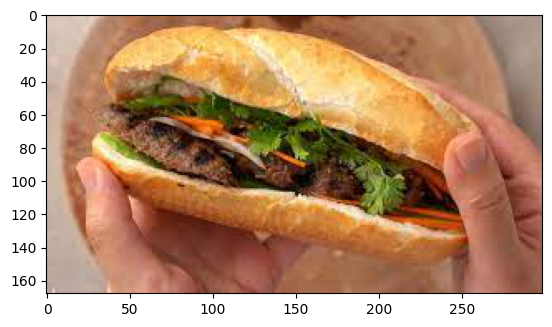

1/1 [==============================] - 0s 22ms/step
banh_tai_heo


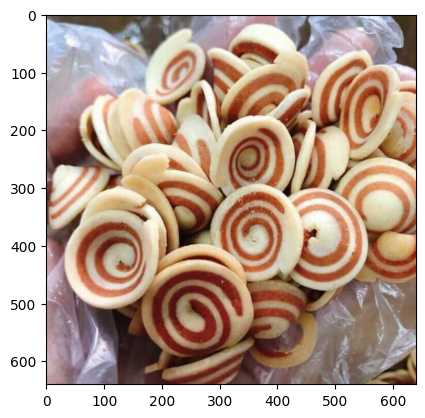

1/1 [==============================] - 0s 23ms/step
banh_bo


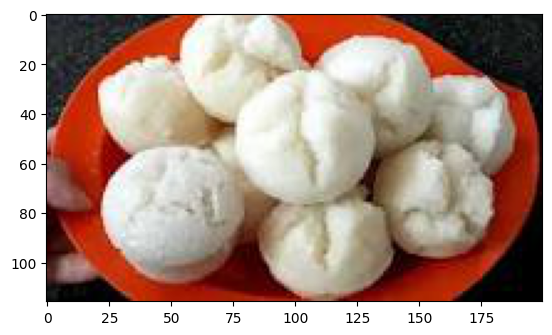

1/1 [==============================] - 0s 24ms/step



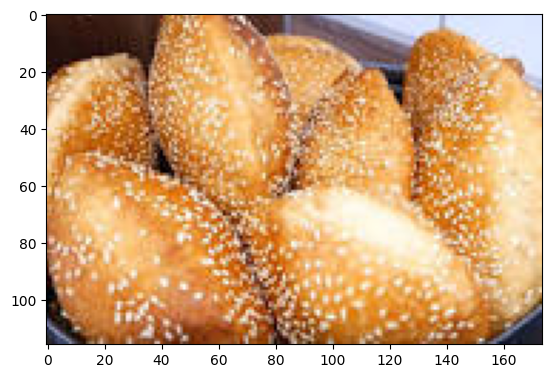

1/1 [==============================] - 0s 31ms/step
banh_xeo


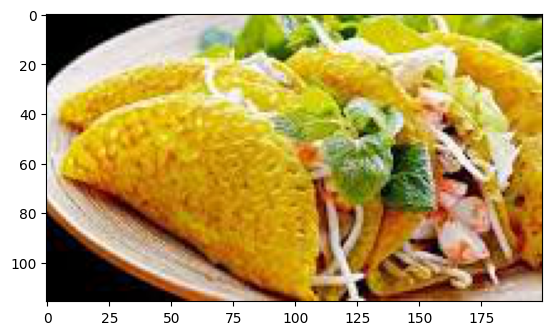

1/1 [==============================] - 0s 40ms/step
banh_trung_thu


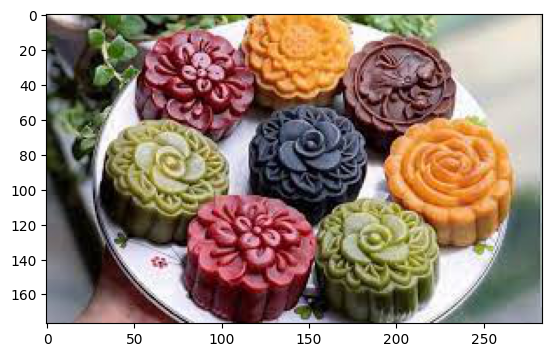

1/1 [==============================] - 0s 41ms/step
banh_bot_loc


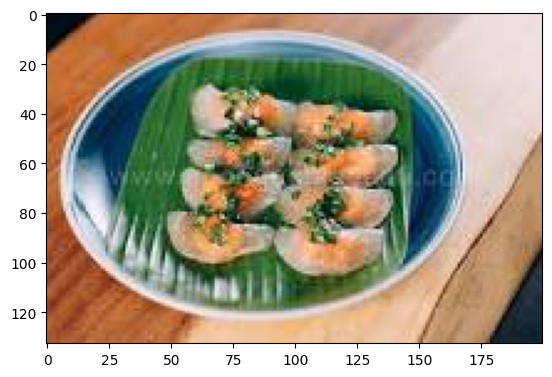

1/1 [==============================] - 0s 25ms/step
banh_trung_thu


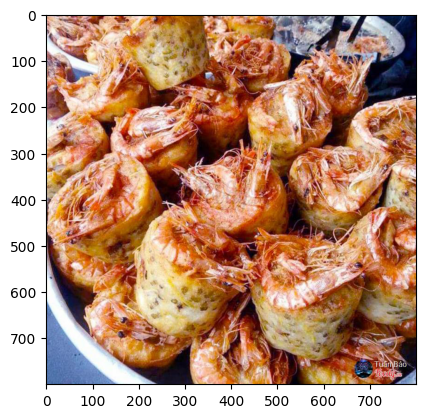

1/1 [==============================] - 0s 26ms/step
banh_da_lon


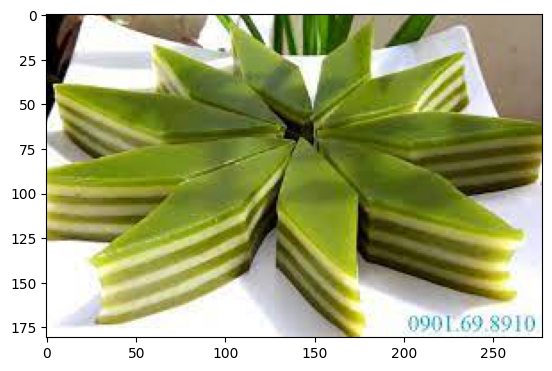

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/test_food/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (40, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','banh_bo', 'banh_bot_loc', 'banh_cong', 'banh_da_lon', 'banh_mi', 'banh_tai_heo', 'banh_tieu', 'banh_trung_thu', 'banh_xeo']
  print(class_name[result])
  plt.show()